<a href="https://colab.research.google.com/github/yadlra/image_processing/blob/main/exploring_imagepr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Card

Corn or Maize Leaf Disease Dataset

*About the Dataset*

A [dataset](https://www.kaggle.com/datasets/smaranjitghose/corn-or-maize-leaf-disease-dataset/data) for classification of corn or maize plant leaf diseases taken from kaggle

*Dataset Description:*

    0: Common Rust - 1306 images
    1: Gray Leaf Spot - 574 images
    2: Blight -1146 images
    3: Healthy - 1162 images

*Citations:*

  - Singh D, Jain N, Jain P, Kayal P, Kumawat S, Batra N. PlantDoc: a dataset for visual plant disease detection. InProceedings of the 7th ACM IKDD CoDS and 25th COMAD 2020 Jan 5 (pp. 249-253).

  - J, ARUN PANDIAN; GOPAL, GEETHARAMANI (2019), “Data for: Identification of Plant Leaf Diseases Using a 9-layer Deep Convolutional Neural Network”, Mendeley Data, V1, doi: 10.17632/tywbtsjrjv.


**What am I trying to achieve?**

With this dataset of corn or maize plant leaf diseases, the primary machine learning task I am going for achieving is image classification.

Specifically, I am looking at a multi-class classification problem where my goal is to accurately identify which of the four categories (Common Rust, Gray Leaf Spot, Blight, Healthy) a given leaf image belongs to.


**Objective**

The objective is to develop a machine learning model capable of analyzing images of corn leaves and classifying them into one of four categories based on their disease status or health.
Such a model can be incredibly valuable for:

* Agricultural technology: Assisting farmers in early detection of leaf diseases, enabling timely treatment and potentially increasing crop yields.
* Research: Helping agronomists and plant scientists in studying disease prevalence, distribution, and management strategies.
* Automated monitoring systems: Integrating with drone or robotic systems to monitor crop health at scale.

**I will decide later on what I wanna do, but for now I will keep exploring and develop a ML model. *italicised text*

**My approach**

Given the visual nature of the task (image classification), Convolutional Neural Networks (CNNs) are typically the most effective model type due to their ability to learn spatial hierarchies of features from images. Here's a basic approach to tackle this problem:

* Data Preprocessing: Includes resizing images to a uniform size (which you've already done), normalizing pixel values, and possibly augmenting the dataset to increase its size and variability if needed.

* Model Selection:
  * Starting with a simple CNN model:  I am starting with a basic CNN architecture to establish a performance baseline.
  * Using transfer learning: For improved accuracy, especially with a moderate-sized dataset, I will be using a pre-trained model (like ResNet, Inception, VGG, etc.) and fine-tune it on the dataset.

* Training and Validation: Using the training set to train the model and the validation set to tune hyperparameters and prevent overfitting. This involves selecting the right learning rate, deciding on the number of epochs, and potentially using callbacks like early stopping.

* Evaluation: Using the test set (which the model has never seen during training) to evaluate the model's performance. Metrics to consider include accuracy, precision, recall, and the F1 score.

* Fine-tuning and Optimization: Based on initial results, I may need to adjust the model architecture, data preprocessing steps, or training procedure. Experimentation is key to finding the best solution.


    


**Exploring the dataset**

-   Familiarising myself with the dataset structure. Noting how the images are organized (usually in folders named after the labels) and their format (e.g., JPG, PNG).

In [7]:
import cv2
import os
import matplotlib.pyplot as plt

dataset_path = '/content/drive/MyDrive/data'
categories = os.listdir(dataset_path)

# Printing out file names of the first few images in each category
for category in categories:
    files = os.listdir(os.path.join(dataset_path, category))
    print(f"Category: {category}, Sample files: {files[:3]}")

Category: Gray_Leaf_Spot, Sample files: ['Corn_Gray_Spot (301).JPG', 'Corn_Gray_Spot (23).jpg', 'Corn_Gray_Spot (304).JPG']
Category: Common_Rust, Sample files: ['Corn_Common_Rust (1025).JPG', 'Corn_Common_Rust (113).JPG', 'Corn_Common_Rust (1081).JPG']
Category: Blight, Sample files: ['Corn_Blight (59).jpg', 'Corn_Blight (453).JPG', 'Corn_Blight (488).JPG']
Category: Healthy, Sample files: ['Corn_Health (756).jpg', 'Corn_Health (902).jpg', 'Corn_Health (800).jpg']


**Performing exploratory data analysis (EDA):**
    
  -   Loading some images from each category to visualize the diseases and the healthy leaves.
  
  - Using libraries like `matplotlib` or `opencv-python` for visualization.

  -   Checking for any inconsistencies in the images, such as varying sizes, orientations, or quality, that may require preprocessing.

  
   **What is this step trying to find:**

  * Display images: For a quick visual inspection of each category, helping identify any glaring issues with orientation or quality.

  * Print dimensions: Outputs the dimensions of all images in each category, allowing you to quickly identify any significant variations in size that might require preprocessing to standardize.

**Checking for Inconsistencies:**

  * Size Variations: I am looking for wide variations in image sizes that could affect model training.
  
  Neural networks require inputs of a consistent size, so I might decide to resize all images to a common dimension during preprocessing.


  * Orientation Issues: By visually inspecting the images displayed, I can check if some images are rotated or flipped in ways that might require correction.


  * Quality Concerns: While harder to quantify programmatically in a simple EDA, keeping an eye out for images that are significantly blurrier, noisier, or otherwise of lower quality than others, as these might affect model performance.

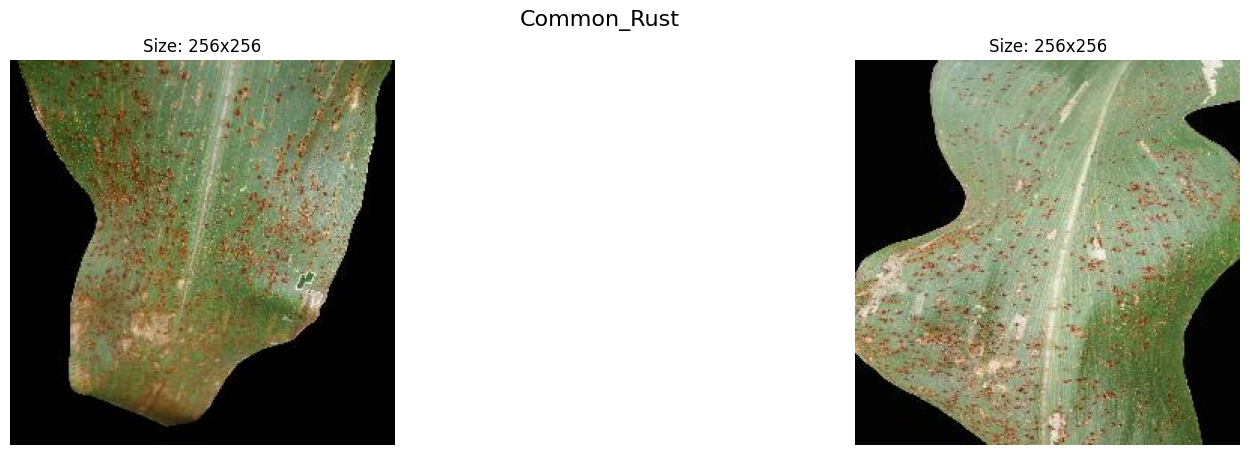

Checking sizes for category: Common_Rust
Corn_Common_Rust (1025).JPG: 256x256
Corn_Common_Rust (113).JPG: 256x256
Corn_Common_Rust (1081).JPG: 256x256
Corn_Common_Rust (1140).JPG: 256x256
Corn_Common_Rust (1278).jpg: 1338x357
Corn_Common_Rust (1145).JPG: 256x256
Corn_Common_Rust (1154).JPG: 256x256
Corn_Common_Rust (1068).JPG: 256x256
Corn_Common_Rust (1155).JPG: 256x256
Corn_Common_Rust (1252).JPG: 256x256
Corn_Common_Rust (1191).JPG: 256x256
Corn_Common_Rust (1181).JPG: 256x256
Corn_Common_Rust (1130).JPG: 256x256
Corn_Common_Rust (1057).JPG: 256x256
Corn_Common_Rust (1273).jpg: 1024x768
Corn_Common_Rust (1136).JPG: 256x256
Corn_Common_Rust (1054).JPG: 256x256
Corn_Common_Rust (1112).JPG: 256x256
Corn_Common_Rust (1165).JPG: 256x256
Corn_Common_Rust (1283).jpg: 392x236
Corn_Common_Rust (1056).JPG: 256x256
Corn_Common_Rust (1195).JPG: 256x256
Corn_Common_Rust (1142).JPG: 256x256
Corn_Common_Rust (449).JPG: 256x256
Corn_Common_Rust (279).JPG: 256x256
Corn_Common_Rust (164).JPG: 256x256

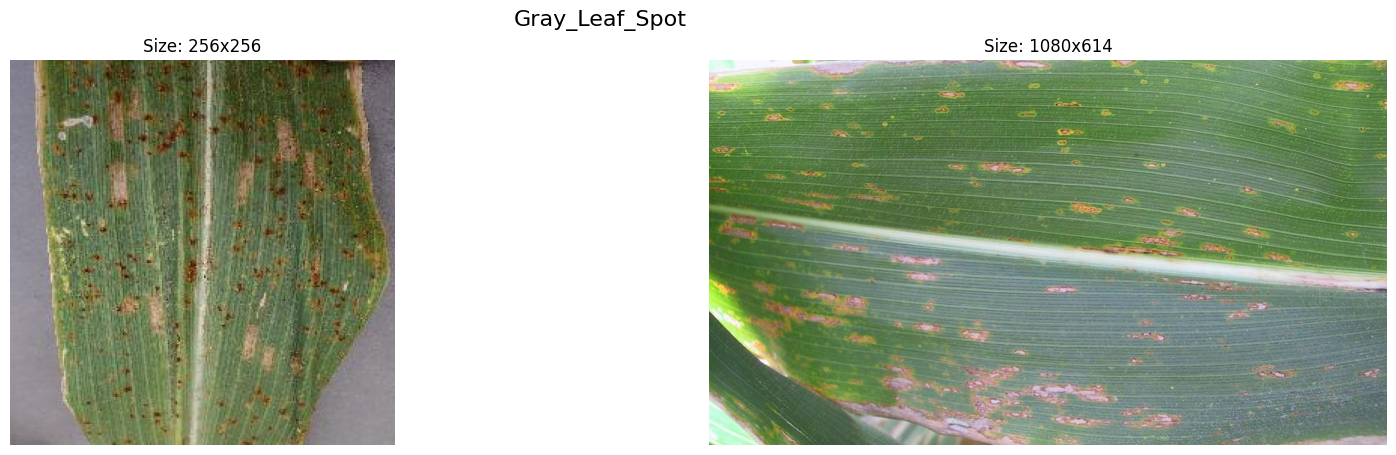

Checking sizes for category: Gray_Leaf_Spot
Corn_Gray_Spot (301).JPG: 256x256
Corn_Gray_Spot (23).jpg: 1080x614
Corn_Gray_Spot (304).JPG: 256x256
Corn_Gray_Spot (252).JPG: 256x256
Corn_Gray_Spot (109).JPG: 256x256
Corn_Gray_Spot (152).JPG: 256x256
Corn_Gray_Spot (332).jpg: 256x256
Corn_Gray_Spot (100).JPG: 256x256
Corn_Gray_Spot (147).jpg: 256x256
Corn_Gray_Spot (11).jpg: 350x299
Corn_Gray_Spot (360).JPG: 256x256
Corn_Gray_Spot (388).JPG: 256x256
Corn_Gray_Spot (174).jpg: 256x256
Corn_Gray_Spot (253).JPG: 256x256
Corn_Gray_Spot (114).jpg: 256x256
Corn_Gray_Spot (314).JPG: 256x256
Corn_Gray_Spot (341).JPG: 256x256
Corn_Gray_Spot (139).JPG: 256x256
Corn_Gray_Spot (303).JPG: 256x256
Corn_Gray_Spot (380).JPG: 256x256
Corn_Gray_Spot (226).JPG: 256x256
Corn_Gray_Spot (403).JPG: 256x256
Corn_Gray_Spot (185).JPG: 256x256
Corn_Gray_Spot (40).jpg: 432x324
Corn_Gray_Spot (218).JPG: 256x256
Corn_Gray_Spot (227).JPG: 256x256
Corn_Gray_Spot (271).JPG: 256x256
Corn_Gray_Spot (273).JPG: 256x256
Corn_G

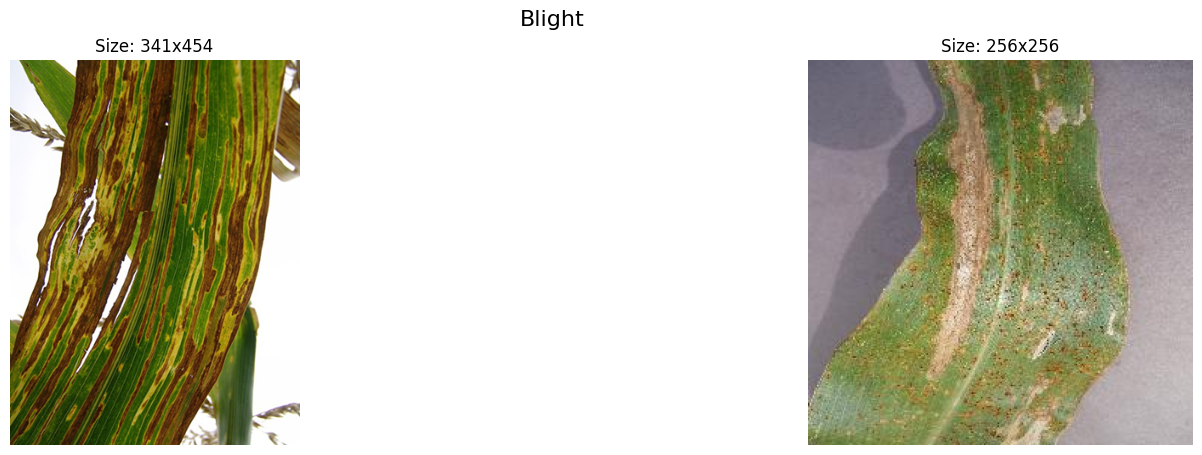

Checking sizes for category: Blight
Corn_Blight (59).jpg: 341x454
Corn_Blight (453).JPG: 256x256
Corn_Blight (488).JPG: 256x256
Corn_Blight (222).JPG: 256x256
Corn_Blight (619).JPG: 256x256
Corn_Blight (627).JPG: 256x256
Corn_Blight (347).JPG: 256x256
Corn_Blight (284).jpg: 256x256
Corn_Blight (583).JPG: 256x256
Corn_Blight (197).JPG: 256x256
Corn_Blight (595).JPG: 256x256
Corn_Blight (636).jpg: 256x256
Corn_Blight (553).JPG: 256x256
Corn_Blight (226).JPG: 256x256
Corn_Blight (167).JPG: 256x256
Corn_Blight (367).JPG: 256x256
Corn_Blight (435).JPG: 256x256
Corn_Blight (565).JPG: 256x256
Corn_Blight (509).JPG: 256x256
Corn_Blight (607).JPG: 256x256
Corn_Blight (560).JPG: 256x256
Corn_Blight (547).JPG: 256x256
Corn_Blight (494).JPG: 256x256
Corn_Blight (235).JPG: 256x256
Corn_Blight (34).jpg: 650x1024
Corn_Blight (563).JPG: 256x256
Corn_Blight (283).JPG: 256x256
Corn_Blight (311).JPG: 256x256
Corn_Blight (258).JPG: 256x256
Corn_Blight (1130).jpg: 1920x1080
Corn_Blight (605).JPG: 256x256
C

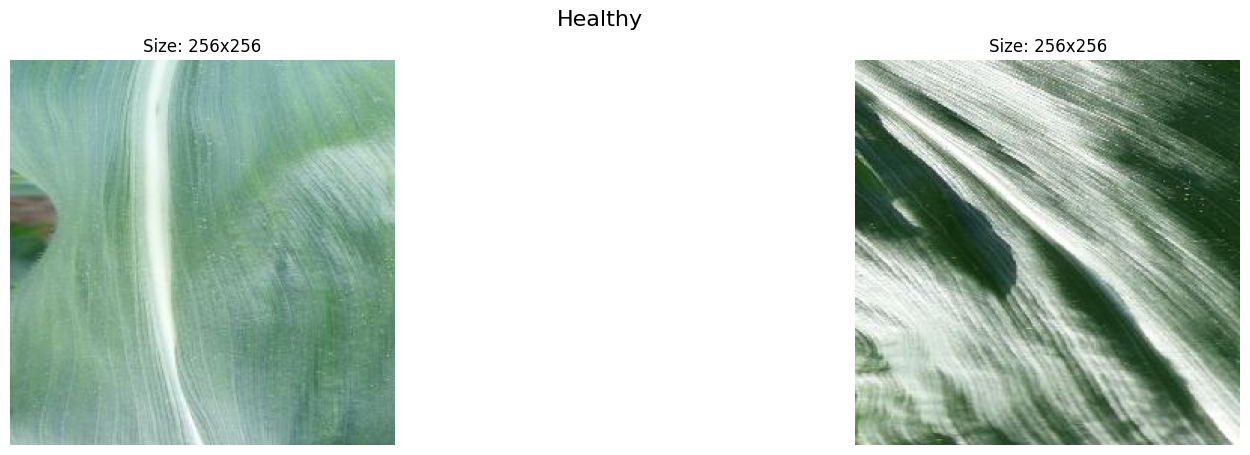

Checking sizes for category: Healthy
Corn_Health (756).jpg: 256x256
Corn_Health (902).jpg: 256x256
Corn_Health (800).jpg: 256x256
Corn_Health (632).jpg: 256x256
Corn_Health (399).jpg: 256x256
Corn_Health (1094).jpg: 256x256
Corn_Health (644) (1).jpg: 256x256
Corn_Health (534).jpg: 256x256
Corn_Health (195).jpg: 256x256
Corn_Health (344).jpg: 256x256
Corn_Health (881).jpg: 256x256
Corn_Health (118).jpg: 256x256
Corn_Health (367).jpg: 256x256
Corn_Health (416).jpg: 256x256
Corn_Health (184).jpg: 256x256
Corn_Health (670).jpg: 256x256
Corn_Health (211).jpg: 256x256
Corn_Health (728).jpg: 256x256
Corn_Health (460).jpg: 256x256
Corn_Health (451).jpg: 256x256
Corn_Health (896).jpg: 256x256
Corn_Health (228).jpg: 256x256
Corn_Health (417).jpg: 256x256
Corn_Health (536).jpg: 256x256
Corn_Health (1140).jpg: 256x256
Corn_Health (1027).jpg: 256x256
Corn_Health (683).jpg: 256x256
Corn_Health (561).jpg: 256x256
Corn_Health (133).jpg: 256x256
Corn_Health (247).jpg: 256x256
Corn_Health (171).jpg: 256

In [6]:
import cv2
import os
import matplotlib.pyplot as plt #I had to repeat to not run the code again (consumption innit?)

def explore_dataset(base_path):
    categories = ['Common_Rust', 'Gray_Leaf_Spot', 'Blight', 'Healthy']
    num_images_to_show = 2  # Number of images to show from each category for visual inspection

    for category in categories:
        category_path = os.path.join(base_path, category)
        image_names = os.listdir(category_path)[:num_images_to_show]  # Load first few images for exploration

        # Display images and their properties
        fig, axes = plt.subplots(1, num_images_to_show, figsize=(20, 5))
        fig.suptitle(category, fontsize=16)

        for idx, image_name in enumerate(image_names):
            image_path = os.path.join(category_path, image_name)
            image = cv2.imread(image_path)
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

            axes[idx].imshow(image_rgb)
            axes[idx].set_title(f"Size: {image.shape[1]}x{image.shape[0]}")
            axes[idx].axis('off')

        plt.show()

        # Print image sizes to check for size inconsistency
        print(f"Checking sizes for category: {category}")
        for image_name in os.listdir(category_path):
            image_path = os.path.join(category_path, image_name)
            image = cv2.imread(image_path)
            print(f"{image_name}: {image.shape[1]}x{image.shape[0]}")  # Print width x height

# Example usage
base_path = '/content/drive/MyDrive/data'  # Update this path
explore_dataset(base_path)


**Preprocessing the Data**

-  Preprocessing the images to make them suitable for training a model.

Discovering that the dataset contains images of varying sizes is quite common in image processing tasks and is an important insight from your exploratory data analysis (EDA).

This variance in image dimensions can significantly impact the performance of most machine learning models, especially neural networks, which typically require input of a uniform size.

As we can see from the outputs above, most images are already set to `256x256` with few exceptions.

If most of your images are already of a uniform size (`256x256` pixels in this case), but only a few are larger, I still have several straightforward options to handle those few outliers to ensure consistency across your dataset.

The approach I choose can depend on the specifics of my project, including the importance of the details in the images, computational constraints, and the performance of the model.

Here are a few strategies:


 1. Resize All Images to a Common Size

Even though most of the images are already at the desired size, resizing all images (including the few larger ones) ensures that every image fed into your model is uniform.

This is critical for neural networks that require fixed input sizes. For the few larger images, resizing down to 256x256 pixels should be relatively lossless in terms of important features, especially if the size difference is not substantial.

*Preprocessing for Size Inconsistency*

To preprocess images of varying sizes, you generally follow these steps:

  * Resizing: Resize images to a common size suitable for your model. This is crucial for deep learning models like Convolutional Neural Networks (CNNs), which expect input of a fixed size. The choice of size depends on the model architecture and computational constraints. Common sizes include 224x224, 256x256, or even smaller for less complex models.

  * Aspect Ratio: When resizing images, maintaining the original aspect ratio might be desirable to avoid distortion. This can be done by padding the images (adding margins of a certain color, typically black or white, to the shorter sides of the image) before resizing to the target dimensions. However, for many tasks, simple resizing without maintaining the aspect ratio is sufficient and simpler.

  * Normalization: After resizing, it's common practice to normalize pixel values. This typically means scaling the values to a range of 0 to 1 or -1 to 1. This step is crucial for helping the convergence of the model during training.

***Remember: addressing these inconsistencies typically involves adding preprocessing steps like resizing, rotation correction, or applying filters to enhance image quality.***

In [19]:
from PIL import Image, ImageOps
import os

def resize_and_save_images(source_dir='/content/drive/MyDrive/data', target_dir='/content/drive/MyDrive/processed_data', size=(256, 256)):
    """
    Resize images in all category folders, convert them to RGB mode if necessary,
    and save them to a new directory, preserving the folder structure.

    Parameters:
    - source_dir: Path to the source directory where the original images are stored.
    - target_dir: Path to the target directory where the resized images will be saved.
    - size: New size for the images.
    """
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    categories = os.listdir(source_dir)
    for category in categories:
        category_path = os.path.join(source_dir, category)
        target_category_path = os.path.join(target_dir, category)
        if not os.path.exists(target_category_path):
            os.makedirs(target_category_path)

        for image_name in os.listdir(category_path):
            image_path = os.path.join(category_path, image_name)
            target_image_path = os.path.join(target_category_path, image_name)

            try:
                with Image.open(image_path) as img:
                    # Convert to RGB if necessary
                    if img.mode in ('RGBA', 'LA', 'P'):
                        img = img.convert('RGB')

                    # Resize image
                    img = ImageOps.fit(img, size, Image.LANCZOS)

                    # Ensure the target path ends with '.jpg' to save as JPEG
                    if not target_image_path.lower().endswith('.jpg'):
                        target_image_path += '.jpg'

                    # Save the resized image
                    img.save(target_image_path, 'JPEG')
            except Exception as e:
                print(f"Error processing {image_path}: {e}")

# Execute the function to resize and save images
resize_and_save_images()


Hmmm according to the error: **cannot write mode RGBA as JPEG**, happens because the image you're trying to save as JPEG has an alpha channel (RGBA stands for Red, Green, Blue, Alpha). JPEG does not support transparency, which is indicated by the alpha channel, so you need to convert the image to RGB mode before saving.

To fix this issue, we can modify the script to convert images to RGB mode if they are in RGBA mode. So we update the `resize_and_save_images` function.



**Splitting the dataset**

After preprocessing the images (resizing and  converting them to RGB), the next step in preparing the dataset for a machine learning project is to split it into training, validation, and testing sets.

This split is crucial for evaluating the performance of the model accurately.




In [20]:
import os
import shutil
from sklearn.model_selection import train_test_split

def split_dataset(source_dir, target_dir, train_size=0.7, val_size=0.15, test_size=0.15):
    """
    Splits the dataset into training, validation, and testing sets.
    """
    categories = os.listdir(source_dir)

    for category in categories:
        # Paths for category in source and target directories
        cat_dir = os.path.join(source_dir, category)
        train_cat_dir = os.path.join(target_dir, 'train', category)
        val_cat_dir = os.path.join(target_dir, 'val', category)
        test_cat_dir = os.path.join(target_dir, 'test', category)

        # Create category directories in train, val, and test
        os.makedirs(train_cat_dir, exist_ok=True)
        os.makedirs(val_cat_dir, exist_ok=True)
        os.makedirs(test_cat_dir, exist_ok=True)

        # Get all images in current category
        images = [os.path.join(cat_dir, img) for img in os.listdir(cat_dir)]

        # Splitting the dataset
        train_val, test_imgs = train_test_split(images, test_size=test_size, random_state=42)
        train_imgs, val_imgs = train_test_split(train_val, test_size=val_size/(train_size+val_size), random_state=42)

        # Function to copy images to respective directories
        def copy_images(images, target_dir):
            for img in images:
                shutil.copy(img, target_dir)

        # Copy images to their respective directories
        copy_images(train_imgs, train_cat_dir)
        copy_images(val_imgs, val_cat_dir)
        copy_images(test_imgs, test_cat_dir)

# Adjust these paths accordingly
source_directory = '/content/drive/MyDrive/processed_data'  # Your preprocessed images directory
target_directory = '/content/drive/MyDrive/split_dataset'  # Where to save the split dataset

split_dataset(source_directory, target_directory)


**Normalization and Augmentation**

Normalization and augmentation are two fundamental processes in the preparation of image data for training machine learning models, especially in the context of deep learning. Each serves a distinct purpose in improving the model's learning efficiency and its ability to generalize from the training data to new, unseen data.

***Normalization***

Normalization is the process of scaling image pixel values to a standard range, usually between 0 and 1 or -1 and 1. This is done by dividing the pixel values by the maximum possible value (typically 255 for 8-bit images). The reasons for normalization include:

  * Improves Numerical Stability: Neural networks work better with small input values. Normalizing the data helps in speeding up the training process because it ensures that the gradient descent updates are not too large or too small, but are instead maintained within a range that prevents the gradients from vanishing or exploding.

  * Faster Convergence: When the input features are on a similar scale, the model's optimization algorithm converges to the minimum loss value faster. This can significantly reduce the training time.

  * Consistency Across Images: Images can have varying lighting conditions, contrast, and color profiles. Normalization helps to mitigate these differences, ensuring that the model trains on data that is consistent in terms of intensity distribution.



***Augmentation***

Data augmentation is a technique used to increase the diversity of the training set by applying random transformations, such as rotation, scaling, flipping, and cropping, to the existing images. This has several benefits:

  * Combats Overfitting: By artificially enlarging the training dataset with varied versions of the training images, data augmentation helps in preventing the model from memorizing the exact details of the training images and encourages it to focus on the features that genuinely matter for the task.

  * Increases Model Robustness: Augmented images can simulate variations that the model might encounter in the real world, such as different orientations, sizes, and lighting conditions of the objects. This enhances the model's ability to generalize well to new, unseen images.

  * Balances the Dataset: In cases where some classes are underrepresented in the training data, augmentation can be particularly useful to generate additional examples for those classes, thereby balancing the dataset and improving the model's performance across all classes.

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialising the data generator for preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalization step to rescale pixel values
    # Add any other augmentation parameters here if desired
)

# Example usage:
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/split_dataset/train',
    target_size=(256, 256),  # Assuming you've resized images to 256x256
    batch_size=32,
    class_mode='categorical'  # Assuming a multi-class classification problem
)

validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/split_dataset/val',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/split_dataset/test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

Found 2943 images belonging to 4 classes.
Found 632 images belonging to 4 classes.
Found 633 images belonging to 4 classes.


This is a positive outcome, as it confirms that the data generators were able to locate and load the images from the specified directories.

I can now proceed with using these data generators for training, validation, and testing your deep learning model.

**Building my model**


Now, I will build my model.

The the architecture of  convolutional neural network (CNN) will be defined using a deep learning framework like Keras.

I will start with a simple architecture using Keras Sequential API for image classification.

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Defining my model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # Assuming 4 classes
])

So this is what this is doing (this is more for self-learning purposes).

* Convolutional Layers (Conv2D): These layers are like special glasses that look at different parts of each picture. They can see patterns like shapes and colors. The first layer looks at the whole picture, while the next layers focus on smaller and smaller details.

* MaxPooling Layers (MaxPooling2D): After looking at each part of the picture, these layers help us zoom out and see the big picture again. They don't look at every single detail; instead, they pick out the most important features.

* Flatten Layer: Now that we've looked at all the important parts of the picture and zoomed out, we want to put everything we've seen into a neat list. This layer squishes everything together so we can work with it easily.

* Dense Layers: These layers are like your brain. They take all the information we've gathered from the pictures and try to make sense of it. They decide if a plant is healthy or if it has a disease. The first dense layer thinks really hard about all the details, and the last layer makes the final decision, saying, "This plant is healthy," or "This plant has a problem."


So, the model looks at the pictures, finds patterns, zooms out to see the big picture, thinks about everything it's seen, and finally decides if a plant is healthy or not.

***But does it really see the big picture?***


**Compiling the model**

Anyways, now I need to compile my model.

Here, we specify the loss function, optimizer, and evaluation metrics for the model.

For multi-class classification problems like mine, categorical cross-entropy is commonly used as the loss function.

In [36]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Here, I am configuring the training process for our neural network model.

* Adam is an adaptive learning rate optimization algorithm. It's widely used because it's efficient and requires little tuning of hyperparameters. Adam adjusts the learning rate during training, allowing the model to converge faster and more reliably.

* loss='categorical_crossentropy': This is the loss function that the model will use to measure how well it's doing during training. Categorical crossentropy is commonly used for multi-class classification problems, like the one we have with our plant disease dataset. It measures the difference between the predicted probability distribution and the actual distribution of the class labels.

* metrics=['accuracy']: This specifies the metrics that we want to monitor during training. Accuracy is a common metric for classification problems, representing the proportion of correctly classified images out of all the images. We're interested in seeing how well our model predicts the correct class labels compared to the true labels.

In [37]:
# Defining checkpoint path and create a checkpoint callback
checkpoint_path = "training_1/cp.ckpt"
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              save_weights_only=True,
                              verbose=1,
                              save_best_only=True)

**Training the model**

I will use the `fit_generator` function to train the model on the training data generated by the train_generator.

Monitor the training process, including metrics such as accuracy and loss, to ensure the model is learning properly.

In [38]:
# Starting training with the checkpoint callback
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Adjusting the number of epochs if necessary
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[cp_callback]  # Ensuring the model's best version is saved
)


Epoch 1/10
91/91 [==============================] - ETA: 0s - loss: 0.6668 - accuracy: 0.7547
Epoch 1: val_loss improved from inf to 0.39223, saving model to training_1/cp.ckpt
91/91 [==============================] - 491s 5s/step - loss: 0.6668 - accuracy: 0.7547 - val_loss: 0.3922 - val_accuracy: 0.8421
Epoch 2/10
91/91 [==============================] - ETA: 0s - loss: 0.3729 - accuracy: 0.8523
Epoch 2: val_loss did not improve from 0.39223
91/91 [==============================] - 480s 5s/step - loss: 0.3729 - accuracy: 0.8523 - val_loss: 0.4404 - val_accuracy: 0.8372
Epoch 3/10
91/91 [==============================] - ETA: 0s - loss: 0.3287 - accuracy: 0.8777
Epoch 3: val_loss improved from 0.39223 to 0.35305, saving model to training_1/cp.ckpt
91/91 [==============================] - 471s 5s/step - loss: 0.3287 - accuracy: 0.8777 - val_loss: 0.3530 - val_accuracy: 0.8602
Epoch 4/10
91/91 [==============================] - ETA: 0s - loss: 0.2214 - accuracy: 0.9158
Epoch 4: val_loss

**Output will go here**

**Monitoring the training process**

After calling fit_generator(), we can monitor the training process by visualizing metrics like loss and accuracy.

It's a common practice to monitor the training progress in real-time.

While the training is ongoing, we can execute the code to plot the training and validation metrics.
This code will update the plots as the training progresses.

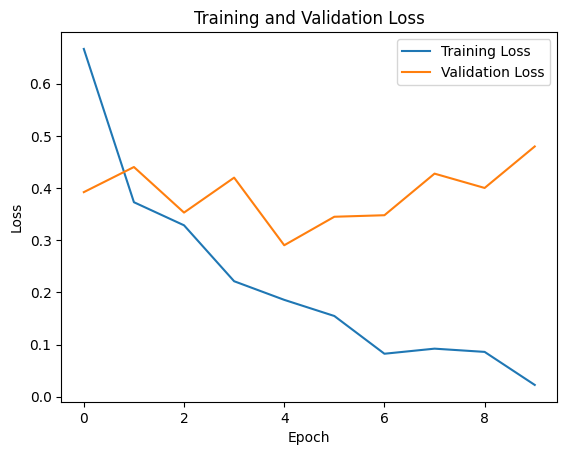

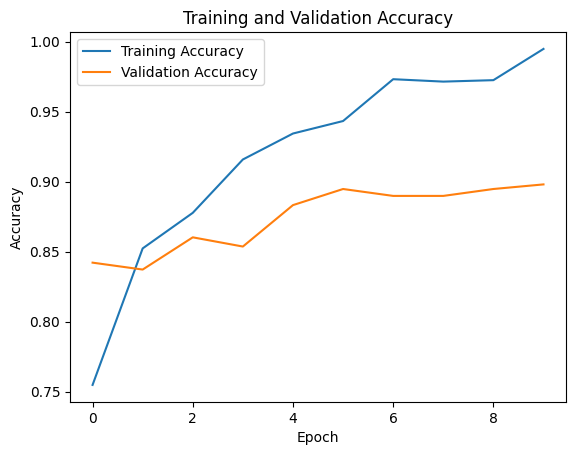

In [39]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**Validating the model**

After each training epoch, we will evaluate the model's performance on the validation data generated by the `validation_generator`. This helps us monitor for overfitting and ensures the model generalizes well to unseen data.

In [40]:
validation_loss, validation_accuracy = model.evaluate_generator(validation_generator)


<ipython-input-40-8bb6b90a7fbf>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  validation_loss, validation_accuracy = model.evaluate_generator(validation_generator)


**Fine-tuning the model**

If necessary, we can adjust the model architecture, data preprocessing, or training parameters based on the validation results to improve performance.

**Evaluating the model**

In [41]:
test_loss, test_accuracy = model.evaluate_generator(test_generator)

<ipython-input-41-307f62691bfd>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_accuracy = model.evaluate_generator(test_generator)


**Interpretation of results**

We can now the results *to* understand where the model performs well and where it might be making errors.

We can look at metrics like precision, recall, and the confusion matrix.

LOLS!

  Epoch 1:
        Training Loss: 0.6668
        Training Accuracy: 0.7547
        Validation Loss: 0.3922
        Validation Accuracy: 0.8421
        The validation loss improved from infinity (inf) to 0.39223 in comparison to the previous state. The model's weights were saved to the checkpoint file training_1/cp.ckpt.

  Epoch 2:
        Training Loss: 0.3729
        Training Accuracy: 0.8523
        Validation Loss: 0.4404
        Validation Accuracy: 0.8372
        The validation loss did not improve from the previous epoch.

  Epoch 3:
        Training Loss: 0.3287
        Training Accuracy: 0.8777
        Validation Loss: 0.3530
        Validation Accuracy: 0.8602
        The validation loss improved from 0.39223 to 0.35305. The model's weights were saved to the checkpoint file training_1/cp.ckpt.

  Epoch 4 to 10:
        Similar patterns continue, where the validation loss either improves or does not improve from the previous epoch.

Analysis:

  The epochs show fluctuations in training and validation loss and accuracy metrics. The model's performance seems to vary across epochs, with some epochs showing improvements in validation loss, while others do not.

Action:

   Given the observed behavior, you might want to analyze the trends further. If the validation loss continues to decrease or stabilize over multiple epochs, it suggests that the model is learning effectively. However, if the validation loss starts to increase consistently while the training loss decreases, it could indicate overfitting, and adjustments to the model architecture or training parameters may be necessary. Additionally, you can use techniques like early stopping to prevent overfitting and save computational resources.



**Deployment !!!**

I think I am planning to use my model in a practical application, maybe artistically!